In [ ]:
! pip install pennylane
! pip install qutip
! pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 14.0 MB/s eta 0:00:00


In [ ]:
from drive.MyDrive.Notebook_tesis_def.dll.gate_procesor import *
from drive.MyDrive.Notebook_tesis_def.dll.hello import *
from drive.MyDrive.Notebook_tesis_def.dll.spin_procesor import *
from drive.MyDrive.Notebook_tesis_def.dll.main_fun import *
from drive.MyDrive.Notebook_tesis_def.dll.baseline_dru import *
from drive.MyDrive.Notebook_tesis_def.dll.cost_fub import *
from drive.MyDrive.Notebook_tesis_def.dll.models import *

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [ ]:
import statistics

# Funciones

In [ ]:
def plot_pulses_v2(self, verbose = 1, key_show = 'all'):
  resultado = self.pulse_type
  glob_time = self.global_time
  for key in resultado:
    list_pulses = resultado[key]
    if list_pulses[0]['Type_pulse'] == 'Unitary':
      global_time_sim = np.linspace(0, dru_circuit.global_time , 1000)
      B1_pulses = np.zeros(len(global_time_sim ))
      B0_pulses = np.zeros(len(global_time_sim ))
      for dict_pulse in list_pulses:
        # B0 results
        args2= {"t_init": dict_pulse['t_i'], "t_final": dict_pulse['t_f']}
        B0_i = dict_pulse['B0'] * pulse_z(
                                  global_time_sim,
                                  args2)
        B0_pulses += np.array(B0_i)
        # B1 results
        # Correccion:
        if dict_pulse['B1'] != 0:
          dv = self.noise_std/abs(dict_pulse['B1'])
        else:
          dv = 0
        args2= {"t_init": dict_pulse['t_i'], "t_final": dict_pulse['t_f'], "std_noise": dv }
        B1_i = dict_pulse['B1'] * pulse_x_with_noise(
                                  global_time_sim,
                                  args2)
        B1_pulses += np.array(B1_i)
      # Plot
      plt.figure(figsize=(8,3))
      plt.plot(global_time_sim* 1e6, B0_pulses,linewidth=1.7, color='darkblue')
      plt.title("Pulse sequence for B0")
      plt.xlabel("time [µs]")
      plt.ylabel("B0 [T]")
      plt.grid()
      plt.show()

      plt.figure(figsize=(8,3))
      plt.plot(global_time_sim* 1e6, B1_pulses,linewidth=1.7, color='darkblue')
      plt.title("Pulse sequence for B1")
      plt.xlabel("time [µs]")
      plt.ylabel("B1 [T]")
      plt.grid()
      plt.show()

    elif list_pulses[0]['Type_pulse'] == "Two_Qubits":
      global_time_sim = np.linspace(0, dru_circuit.global_time , 1000)
      J_pulses = np.zeros(len(global_time_sim ))
      for dict_pulse in list_pulses:
        args2= {"t_init": dict_pulse['t_i'], "t_final": dict_pulse['t_f']}
        J_i = dict_pulse['J'] * pulse_x(
                                  global_time_sim,
                                  args2)
        J_pulses += np.array(J_i)
      plt.figure(figsize=(8,3))
      plt.plot(global_time_sim* 1e6, J_pulses,linewidth=1.7, color='darkblue')
      plt.title("Pulse sequence for J")
      plt.xlabel("time [µs]")
      plt.ylabel("J [hz]")
      plt.grid()
      plt.show()

In [ ]:
def plot_pulses_v2_chgpt(self, verbose=1, key_show='all'):
    resultado = self.pulse_type

    # Variables para almacenar las pulsaciones Unitary y Two_Qubits
    unitary_pulses = []
    two_qubits_pulses = []

    for key in resultado:
        list_pulses = resultado[key]
        if list_pulses[0]['Type_pulse'] == 'Unitary':
            global_time_sim = np.linspace(0, dru_circuit.global_time, 1000)
            B1_pulses = np.zeros(len(global_time_sim))
            B0_pulses = np.zeros(len(global_time_sim))
            for dict_pulse in list_pulses:
                # B0 results
                args2 = {"t_init": dict_pulse['t_i'], "t_final": dict_pulse['t_f']}
                B0_i = dict_pulse['B0'] * pulse_z(
                    global_time_sim,
                    args2)
                B0_pulses += np.array(B0_i)
                # B1 results
                # Correccion:
                if dict_pulse['B1'] != 0:
                    dv = self.noise_std / abs(dict_pulse['B1'])
                else:
                    dv = 0
                args2 = {"t_init": dict_pulse['t_i'], "t_final": dict_pulse['t_f'], "std_noise": dv}
                B1_i = dict_pulse['B1'] * pulse_x_with_noise(
                    global_time_sim,
                    args2)
                B1_pulses += np.array(B1_i)

            # Almacenar los pulsos en la lista de pulsos Unitary
            unitary_pulses.append((global_time_sim, B0_pulses, B1_pulses))

        elif list_pulses[0]['Type_pulse'] == "Two_Qubits":
            global_time_sim = np.linspace(0, dru_circuit.global_time, 1000)
            J_pulses = np.zeros(len(global_time_sim))
            for dict_pulse in list_pulses:
                args2 = {"t_init": dict_pulse['t_i'], "t_final": dict_pulse['t_f']}
                J_i = dict_pulse['J'] * pulse_x(
                    global_time_sim,
                    args2)
                J_pulses += np.array(J_i)

            # Almacenar los pulsos en la lista de pulsos Two_Qubits
            two_qubits_pulses.append((global_time_sim, J_pulses))

    # Graficar los pulsos Unitary en una figura
    if unitary_pulses:
        num_plots = len(unitary_pulses)
        fig, axes = plt.subplots(num_plots, 1, figsize=(8, 3 * num_plots))
        if num_plots == 1:
            axes = [axes]
        for i, pulses in enumerate(unitary_pulses):
            global_time_sim, B0_pulses, B1_pulses = pulses
            axes[i].plot(global_time_sim* 1e6, B1_pulses)
            axes[i].set_title("Pulse sequence for B1")
            axes[i].set_xlabel("time [µs]")
            axes[i].set_ylabel("B1 [T]")
            axes[i].grid()
        plt.tight_layout()
        plt.show()

    # Graficar los pulsos Two_Qubits en una figura
    if two_qubits_pulses:
        num_plots = len(two_qubits_pulses)
        fig, axes = plt.subplots(num_plots, 1, figsize=(8, 3 * num_plots))
        if num_plots == 1:
            axes = [axes]
        for i, pulses in enumerate(two_qubits_pulses):
            global_time_sim, J_pulses = pulses
            axes[i].plot(global_time_sim * 1e6, J_pulses)
            axes[i].set_title("Pulse sequence for J")
            axes[i].set_xlabel("time [µs]")
            axes[i].set_ylabel("J [hz]")
            axes[i].grid()
        plt.tight_layout()
        plt.show()


In [ ]:
def plot_fidelity(model, path_before, entanglement = False):
  before, dict_samples_before_1_qubit = w_r_json('r', path_before)
  # params before
  np.random.seed(42)
  params = np.random.uniform(size=(model.n_qubits*model.num_layers, 3), requires_grad=True)
  bias = np.random.uniform(size=(model.n_qubits*model.num_layers, 3), requires_grad=True)
  # get states
  list_dict_states_spin_dru = []
  for xi in model.X_train:
    #print(xi)
    if model.n_qubits == 1:
      dru_circuit_1_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 1)
      state_dru = dru_circuit_1_q.qcircuit_DRU_1_Qubit(params, xi, bias=bias, entanglement = entanglement)
      list_dict_states_spin_dru.append(dru_circuit_1_q.dict_states)
    elif model.n_qubits == 2:
      dru_circuit_2_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 2,
                                               ket_dru_0 = tensor(basis(2, 0),basis(2, 0)),
                                               J = 12e6)
      state_dru = dru_circuit_2_q.qcircuit_DRU_2_Qubit(params, xi, bias=bias,  entanglement = entanglement)
      list_dict_states_spin_dru.append(dru_circuit_2_q.dict_states)
    elif model.n_qubits == 4:
      dru_circuit_4_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 4,
                                               ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)),
                                                J = 12e6)
      state_dru = dru_circuit_4_q.qcircuit_DRU_4_Qubit(params, xi, bias=bias,
                                               entanglement = entanglement)
      list_dict_states_spin_dru.append(dru_circuit_4_q.dict_states)
  # Obtener fidelidad por estado:
  N_states_bl = len(dict_samples_before_1_qubit)
  N_states_spin = len(list_dict_states_spin_dru)
  print(f"N sates base line {N_states_bl} \n N sates spin {N_states_spin}")
  dict_states_fidelities = []
  for i in range(N_states_bl):
    dict_bl = dict_samples_before_1_qubit[i]
    dict_spin = list_dict_states_spin_dru[i]
    Fidelities_by_state = {}
    try:
      for key in dict_bl:
        state_spin = dict_spin[key]
        state_bl_i = dict_bl[key].numpy()
        state_bl_i  = Qobj(state_bl_i)
        state_spin  = Qobj(state_spin)
        F = fidelity_qutip(state_spin, state_bl_i)
        Fidelities_by_state[key] = F
    except:
      pass
    dict_states_fidelities.append(Fidelities_by_state)

  # Grafica
  ket_labels = list(dict_states_fidelities[0].keys())
  promedios = {ket: [] for ket in ket_labels}
  for diccionario in dict_states_fidelities:
      for ket, valor in diccionario.items():
          promedios[ket].append(valor)
  # Calcular el promedio para cada 'ket_1_qubit_i'
  promedios_mean = {ket: sum(valores) / len(valores) for ket, valores in promedios.items()}
  promedios_desviacion = {key: statistics.stdev(values) for key, values in promedios.items()}

  # Exportar
  data = {'Qubits': list(promedios_mean.keys()),
            'Promedio': list(promedios_mean.values()),
            'Desviación estándar': list(promedios_desviacion.values())}
  df = pd.DataFrame(data)
  df.to_excel('promedios_desviaciones.xlsx', index=False)

  # Crear el diagrama de barras

  # grafico
  plt.figure(figsize=(8, 4))
  plt.grid()
  plt.bar(promedios_mean.keys(), promedios_mean.values(), yerr=list(promedios_desviacion.values()), capsize=5, color='blue', alpha=0.7)
  plt.xlabel('Qubits')
  plt.ylabel('Promedio')
  plt.title(f'Promedio de ket_{model.n_qubits}_qubits_i a través de diccionarios')
  plt.xticks(rotation=45)
  plt.ylim(min(promedios_mean.values()) - 0.00000001, max(promedios_mean.values()) + 0.00000001)
  plt.show()


In [ ]:
def plot_fidelity_wr(model, path_before, entanglement = False):
  before, dict_samples_before_1_qubit = w_r_json('r', path_before)
  # params before
  np.random.seed(42)
  params = np.random.uniform(size=(model.n_qubits*model.num_layers, 3), requires_grad=True)
  bias = np.random.uniform(size=(model.n_qubits*model.num_layers, 3), requires_grad=True)
  # get states
  list_dict_states_spin_dru = []
  xxx = model.X_train[0:15]
  for xi in  xxx:
    #print(xi)
    if model.n_qubits == 1:
      dru_circuit_1_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 1)
      state_dru = dru_circuit_1_q.qcircuit_DRU_1_Qubit(params, xi, bias=bias, entanglement = entanglement)
      list_dict_states_spin_dru.append(dru_circuit_1_q.dict_states)
    elif model.n_qubits == 2:
      dru_circuit_2_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 2,
                                               ket_dru_0 = tensor(basis(2, 0),basis(2, 0)),
                                               J = 12e6)
      state_dru = dru_circuit_2_q.qcircuit_DRU_2_Qubit(params, xi, bias=bias,  entanglement = entanglement)
      list_dict_states_spin_dru.append(dru_circuit_2_q.dict_states)
    elif model.n_qubits == 4:
      dru_circuit_4_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 4,
                                               ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)),
                                                J = 12e6)
      state_dru = dru_circuit_4_q.qcircuit_DRU_4_Qubit(params, xi, bias=bias,
                                               entanglement = entanglement)
      list_dict_states_spin_dru.append(dru_circuit_4_q.dict_states)
  # Obtener fidelidad por estado:
  N_states_bl = len(dict_samples_before_1_qubit)
  N_states_spin = len(list_dict_states_spin_dru)
  print(f"N sates base line {N_states_bl} \n N sates spin {N_states_spin}")
  dict_states_fidelities = []
  for i in range(N_states_spin):
    dict_bl = dict_samples_before_1_qubit[i]
    dict_spin = list_dict_states_spin_dru[i]
    Fidelities_by_state = {}
    try:
      for key in dict_bl:
        state_spin = dict_spin[key]
        state_bl_i = dict_bl[key].numpy()
        state_bl_i  = Qobj(state_bl_i)
        state_spin  = Qobj(state_spin)
        F = fidelity_qutip(state_bl_i,state_spin)
        Fidelities_by_state[key] = F
    except:
      pass
    dict_states_fidelities.append(Fidelities_by_state)

  # Grafica
  ket_labels = list(dict_states_fidelities[0].keys())
  promedios = {ket: [] for ket in ket_labels}
  for diccionario in dict_states_fidelities:
      for ket, valor in diccionario.items():
          promedios[ket].append(valor)
  # Calcular el promedio para cada 'ket_1_qubit_i'
  promedios_mean = {ket: sum(valores) / len(valores) for ket, valores in promedios.items()}
  promedios_desviacion = {key: statistics.stdev(values) for key, values in promedios.items()}

  # Exportar
  data = {'Qubits': list(promedios_mean.keys()),
            'Promedio': list(promedios_mean.values()),
            'Desviación estándar': list(promedios_desviacion.values())}
  df = pd.DataFrame(data)
  df.to_excel('promedios_desviaciones.xlsx', index=False)

  # Crear el diagrama de barras

  # grafico
  plt.figure(figsize=(8, 4))
  plt.grid()
  plt.bar(promedios_mean.keys(), promedios_mean.values(), yerr=list(promedios_desviacion.values()), capsize=5, color='blue', alpha=0.7)
  plt.xlabel('Qubits')
  plt.ylabel('Promedio')
  plt.title(f'Promedio de ket_{model.n_qubits}_qubits_i a través de diccionarios')
  plt.xticks(rotation=45)
  plt.ylim(min(promedios_mean.values()) - 0.00000001, max(promedios_mean.values()) + 0.00000001)
  plt.show()
  return promedios_mean, promedios_desviacion, promedios

In [ ]:
fidelity_qutip

<function qutip.metrics.fidelity(A, B)>

# Borrador 1 q table

In [ ]:
X, y =  make_IRIS_v2(3,3)

model = Modelo_DRU(qcircuit_1_qubit_mixed, Trace_Distance,
                        epochs = 5, n_clases = 3, n_qubits = 1,
                        features = 3, num_layers = 3, alpha_noise = 0.0, val_prc = 0.2,
                        save_process = False, save_w_states = True)

paramters_1q, bias_1q = model.fit(X, y)

dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=100,
                                     N_qubits = 1,
                                     tf_noise = False,
                                     noise_std = 0.0000)

state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q,
                                             model.X_val[1],
                                             bias=bias_1q)

[-3.21593942  0.13346807  0.29239675]


Epoch: 100%|██████████| 5/5 [00:16<00:00,  3.32s/it]


[-3.21593942  0.13346807  0.29239675]


In [ ]:
a,b,c = plot_pulses_v2_wr(dru_circuit)

NameError: name 'plot_pulses_v2_wr' is not defined

N sates base line 120 
 N sates spin 15


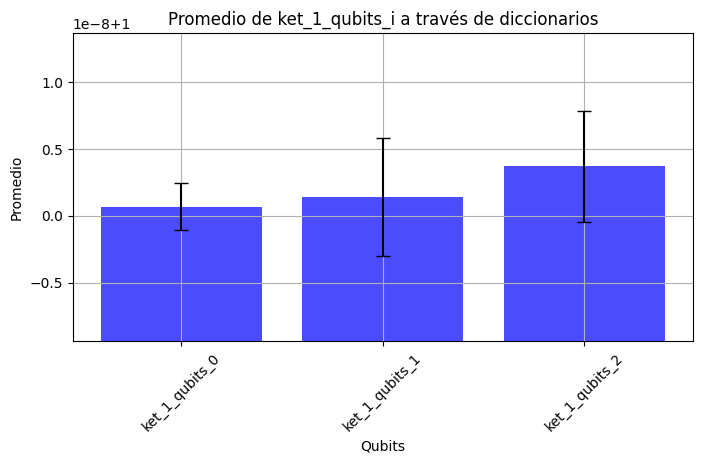

In [ ]:
np.random.seed(42)
path_before = "/content/test_states_before_states.json"
a,b,c = plot_fidelity_wr(model, path_before, entanglement = False)

In [ ]:
a

{'ket_1_qubits_0': 1.0000000006647174,
 'ket_1_qubits_1': 1.0000000013880448,
 'ket_1_qubits_2': 1.0000000036833123}

In [ ]:
b

{'ket_1_qubits_0': 1.7442018073628397e-09,
 'ket_1_qubits_1': 4.416249467524806e-09,
 'ket_1_qubits_2': 4.1602770816217975e-09}

In [ ]:
c

{'ket_1_qubits_0': [1.000000004384908,
  1.0000000008845964,
  0.9999999999743695,
  0.999999999824017,
  0.9999999998017475,
  0.9999999998491703,
  0.9999999999119352,
  1.000000001116212,
  0.9999999998081694,
  0.9999999998246695,
  0.9999999997020999,
  0.999999999971046,
  1.0000000052580167,
  0.999999999836142,
  0.9999999998236636],
 'ket_1_qubits_1': [0.9999999990763571,
  1.000000002999514,
  0.999999999966753,
  0.9999999992598742,
  0.9999999990893517,
  0.9999999997117387,
  0.9999999999011159,
  0.9999999993231881,
  0.9999999990800411,
  0.9999999994888625,
  0.9999999996565615,
  1.0000000104831763,
  0.9999999999437033,
  1.0000000133701192,
  0.9999999994703176],
 'ket_1_qubits_2': [0.9999999986229966,
  0.9999999993531868,
  1.0000000104871445,
  0.9999999992195954,
  1.0000000080920128,
  1.0000000003709695,
  1.0000000051341886,
  0.999999999318626,
  1.0000000065231045,
  1.0000000047617585,
  1.0000000010840076,
  1.0000000052034719,
  0.9999999999330931,
  1.00

# 1 qubit

In [ ]:
X, y =  make_IRIS_v2(3,3)

model = Modelo_DRU(qcircuit_1_qubit_mixed, Trace_Distance,
                        epochs = 5, n_clases = 3, n_qubits = 1,
                        features = 3, num_layers = 10, alpha_noise = 0.0, val_prc = 0.2,
                        save_process = False, save_w_states = True)

paramters_1q, bias_1q = model.fit(X, y)

dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=100,
                                     N_qubits = 1,
                                     tf_noise = False,
                                     noise_std = 0.0000)

state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q,
                                             model.X_val[1],
                                             bias=bias_1q)

[-3.21593942  0.13346807  0.29239675]


Epoch:  20%|██        | 1/5 [00:16<01:05, 16.50s/it]


KeyboardInterrupt: 

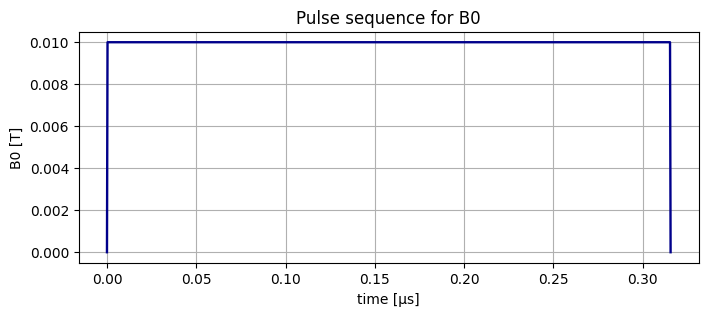

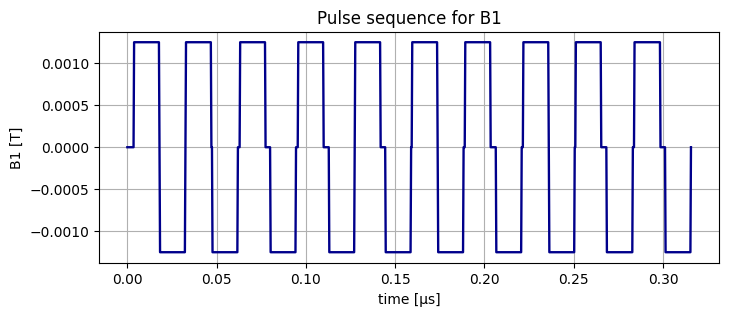

In [ ]:
plot_pulses_v2(dru_circuit)

N sates base line 120 
 N sates spin 120


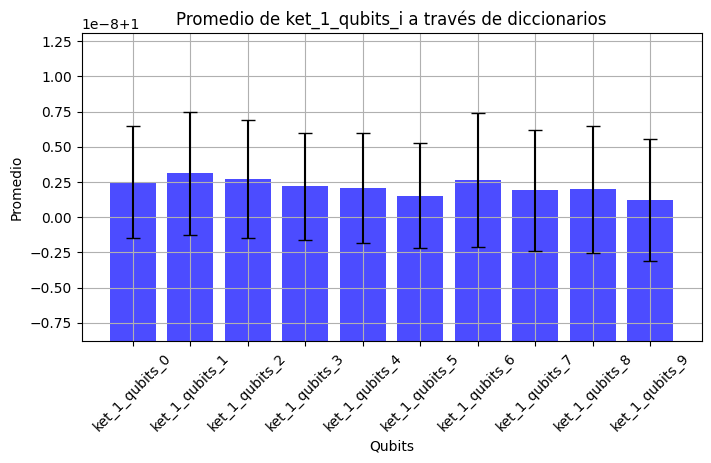

In [ ]:
np.random.seed(42)
path_before = "/content/test_states_before_states.json"
plot_fidelity(model, path_before, entanglement = False)

# 2 qubits sin entrelazamiento

In [ ]:
X, y =  make_IRIS_v2(3,3)

tf_entanglement = False

model = Modelo_DRU(qcircuit_2_qubit_mixed, Trace_Distance_v3,
                        epochs = 2, n_clases = 3, n_qubits = 2,
                        features = 3, num_layers = 3, alpha_noise = 0.0, val_prc = 0.2,
                        save_process = False, save_w_states = True,
                        entanglement = tf_entanglement )

paramters_2q, bias_2q = model.fit(X, y)

dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=1000,
                                     N_qubits = 2,
                                     tf_noise = False,
                                     noise_std = 0.0000,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0)))

state_dru = dru_circuit.qcircuit_DRU_2_Qubit(paramters_2q,
                                             model.X_val[1],
                                             bias=bias_2q,
                                             entanglement = tf_entanglement)

[-3.21593942  0.13346807  0.29239675]


Epoch: 100%|██████████| 2/2 [00:11<00:00,  5.90s/it]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-3.21593942  0.13346807  0.29239675]
N_layers = 3
params_shape = (6, 3)
params_shape = (6, 3)


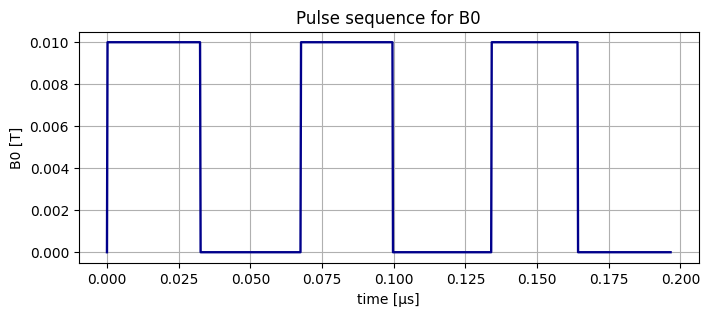

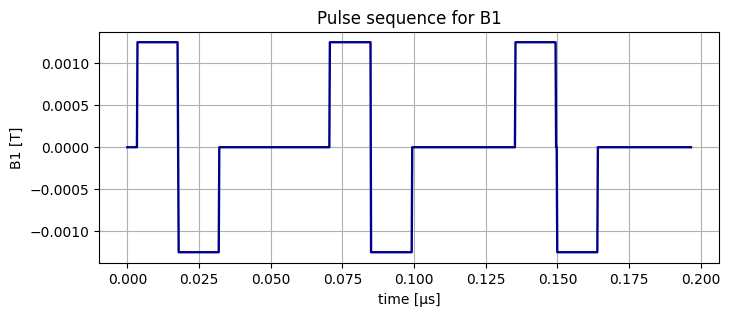

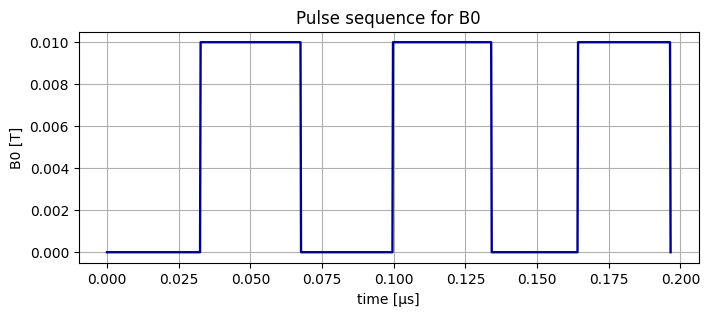

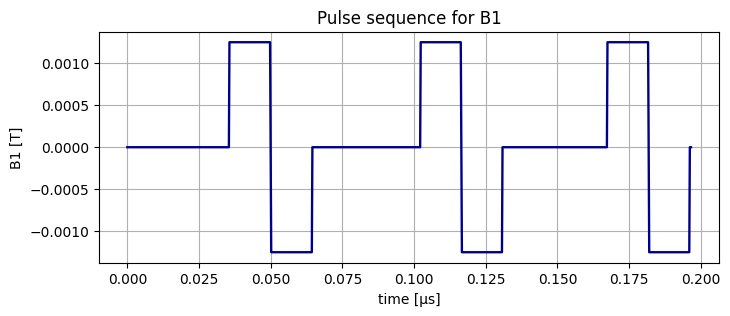

In [ ]:
plot_pulses_v2(dru_circuit)

N sates base line 120 
 N sates spin 120


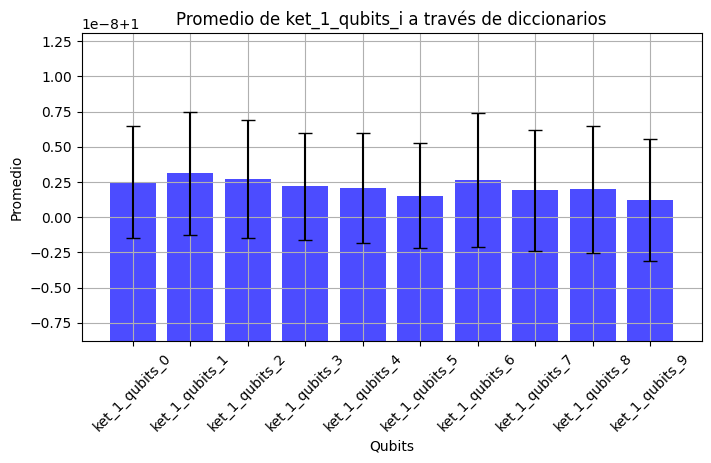

In [ ]:
np.random.seed(42)
path_before = "/content/test_states_before_states.json"
plot_fidelity(model, path_before, entanglement = False)

# 2 qubits con entrelazamiento

In [ ]:
X, y =  make_IRIS_v2(3,3)

tf_entanglement = True

model = Modelo_DRU(qcircuit_2_qubit_mixed, Trace_Distance_v3,
                        epochs = 2, n_clases = 3, n_qubits = 2,
                        features = 3, num_layers = 4, alpha_noise = 0.0, val_prc = 0.2,
                        save_process = False, save_w_states = True,
                        entanglement = tf_entanglement )

paramters_2q, bias_2q = model.fit(X, y)

dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=1000,
                                     N_qubits = 2,
                                     tf_noise = False,
                                     noise_std = 0.0000,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0)),
                                     J = 12e6)

state_dru = dru_circuit.qcircuit_DRU_2_Qubit(paramters_2q,
                                             model.X_val[1],
                                             bias=bias_2q,
                                             entanglement = tf_entanglement)

[-3.21593942  0.13346807  0.29239675]


Epoch: 100%|██████████| 2/2 [00:16<00:00,  8.25s/it]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-3.21593942  0.13346807  0.29239675]
N_layers = 4
params_shape = (8, 3)
params_shape = (8, 3)
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07


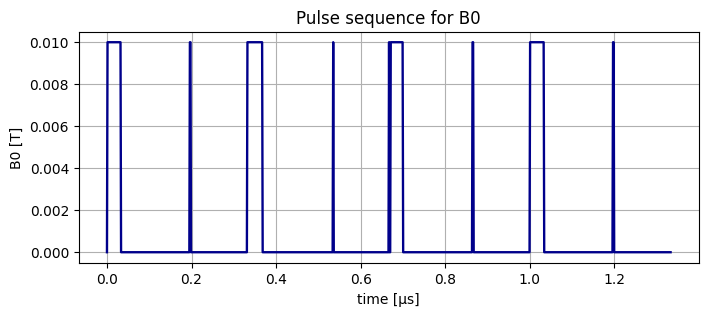

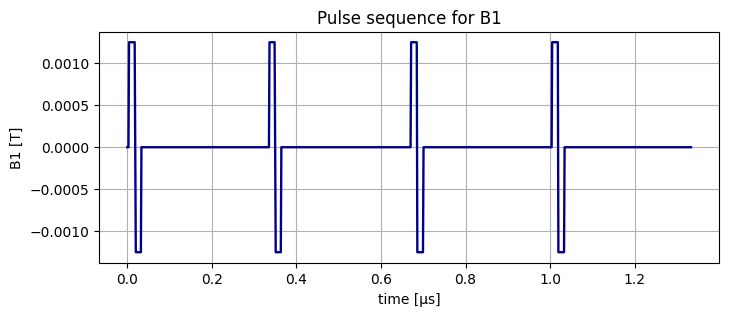

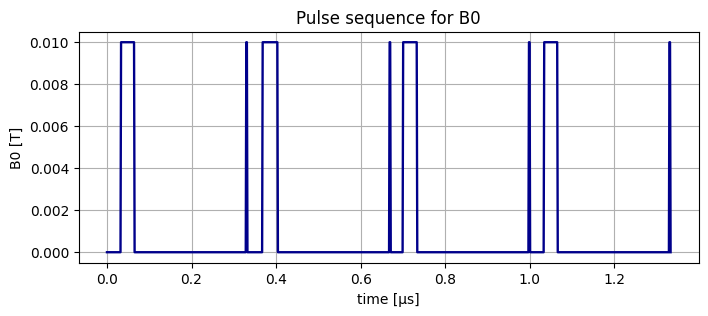

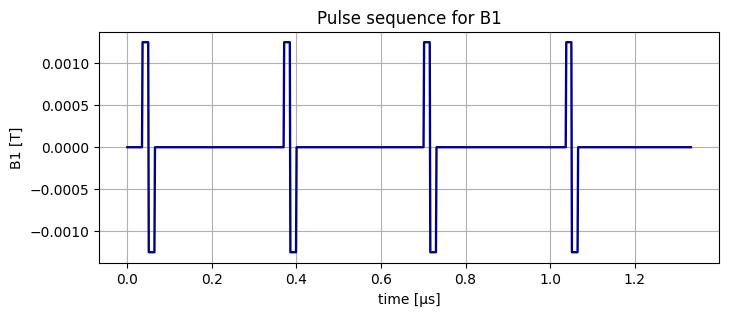

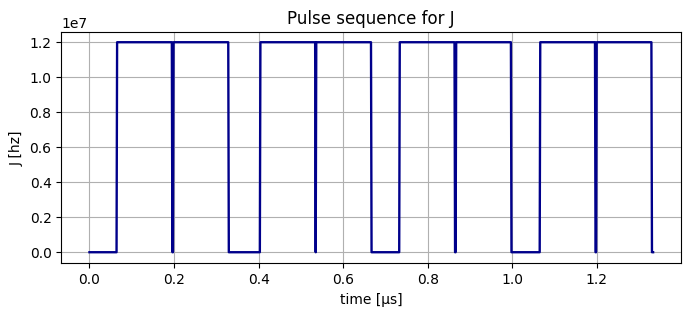

In [ ]:
plot_pulses_v2(dru_circuit)

In [3]:
max([1,2,2,3])

3

N_layers = 4
params_shape = (8, 3)
params_shape = (8, 3)
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
N_layers = 4
params_shape = (8, 3)
params_shape = (8, 3)
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
N_layers = 4
params_shape = (8, 3)
params_shape = (8, 3)
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_

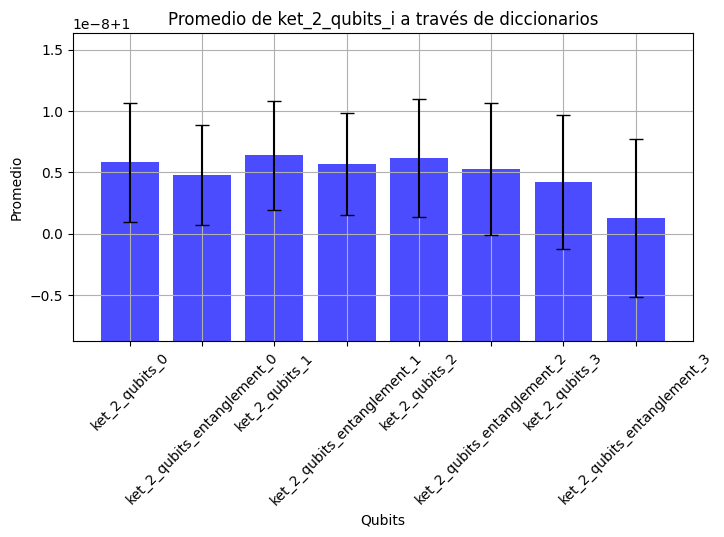

In [ ]:
np.random.seed(42)
path_before = "/content/test_states_before_states.json"
plot_fidelity(model, path_before, entanglement = True)

# 4 qubits sin entrelazamiento

In [ ]:
X, y =  make_IRIS_v2(3,3)

tf_entanglement = False

model = Modelo_DRU(qcircuit_4_qubit_mixed, Trace_Distance_v3,
                        epochs = 2, n_clases = 3, n_qubits = 4,
                        features = 3, num_layers = 3, alpha_noise = 0.0, val_prc = 0.2,
                        save_process = False, save_w_states = True,
                        entanglement = tf_entanglement)

paramters_2q, bias_2q = model.fit(X, y)

dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=100,
                                     N_qubits = 4,
                                     tf_noise = False,
                                     noise_std = 0.0000,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)),
                                     J = 12e6)

state_dru = dru_circuit.qcircuit_DRU_4_Qubit(paramters_2q,
                                             model.X_val[1],
                                             bias=bias_2q,
                                             entanglement = tf_entanglement)



[-3.21593942  0.13346807  0.29239675]


Epoch: 100%|██████████| 2/2 [00:22<00:00, 11.47s/it]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-3.21593942  0.13346807  0.29239675]
Contador general 0
Contador general 1
Contador general 2


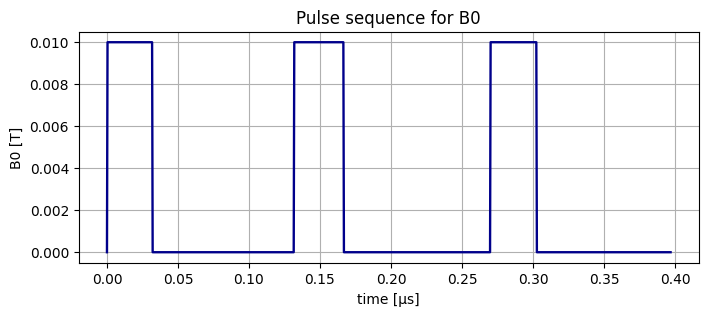

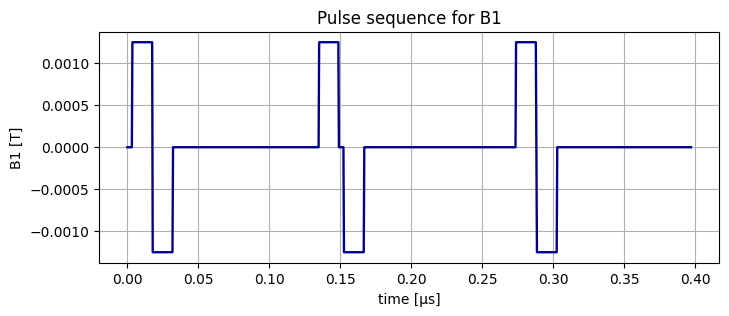

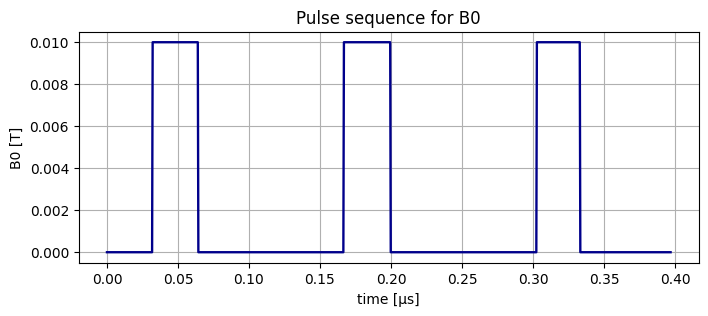

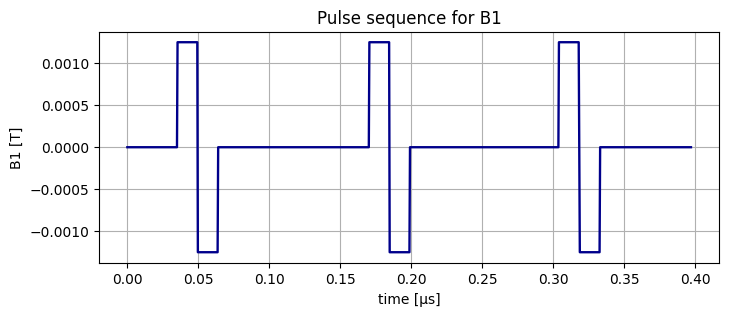

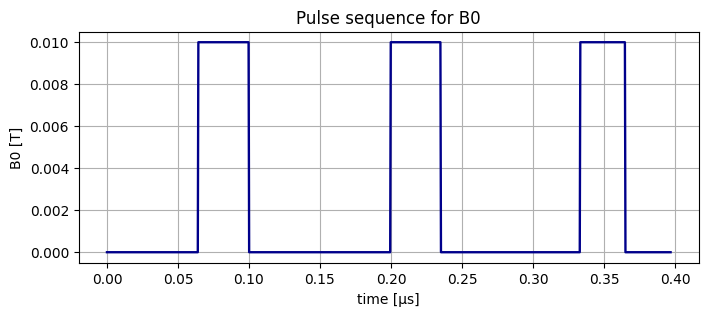

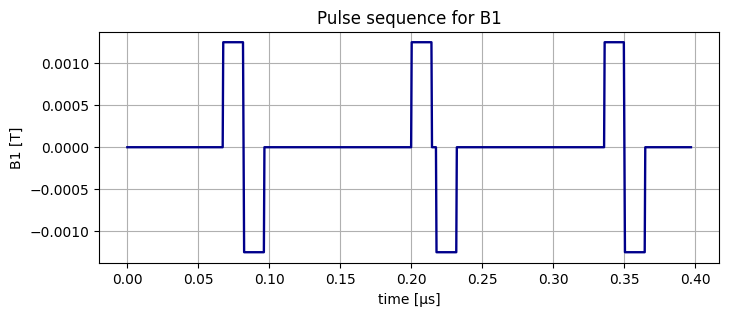

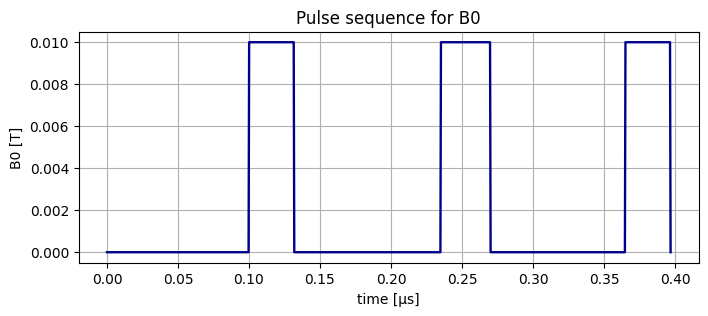

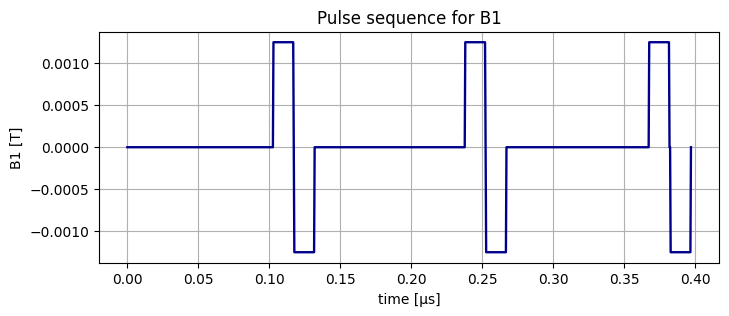

In [ ]:
plot_pulses_v2(dru_circuit)

Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador general 1
Contador general 2
Contador general 0
Contador gen

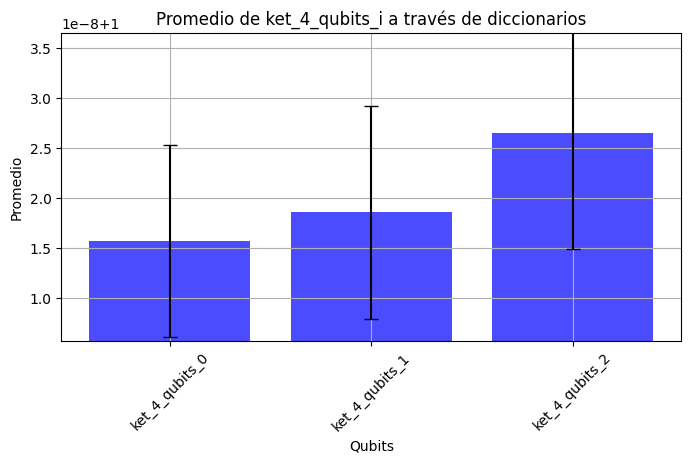

In [ ]:
np.random.seed(42)
path_before = "/content/test_states_before_states.json"
plot_fidelity(model, path_before, entanglement = False)

# 4 qubits con entrelazamiento

In [ ]:
X, y =  make_IRIS_v2(3,3)

tf_entanglement = True

model = Modelo_DRU(qcircuit_4_qubit_mixed, Trace_Distance_v3,
                        epochs = 2, n_clases = 3, n_qubits = 4,
                        features = 3, num_layers = 3, alpha_noise = 0.0, val_prc = 0.2,
                        save_process = False, save_w_states = True,
                        entanglement = tf_entanglement)

paramters_2q, bias_2q = model.fit(X, y)

dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=100,
                                     N_qubits = 4,
                                     tf_noise = False,
                                     noise_std = 0.0000,
                                     ket_dru_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)),
                                     J = 12e6)

state_dru = dru_circuit.qcircuit_DRU_4_Qubit(paramters_2q,
                                             model.X_val[1],
                                             bias=bias_2q,
                                             entanglement = tf_entanglement)

[-3.21593942  0.13346807  0.29239675]


Epoch: 100%|██████████| 2/2 [00:25<00:00, 12.70s/it]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-3.21593942  0.13346807  0.29239675]
Contador general 0
Entro par en 0
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
Contador general 1
Entro impar en 1
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
[0, 3]
time_swap = 2.617993877991494e-07
time_swap = 2.617993877991494e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_swap = 2.617993877991494e-07
time_swap = 2.617993877991494e-07
Contador general 2


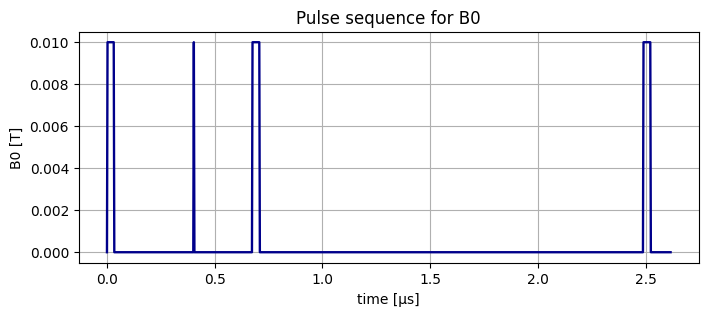

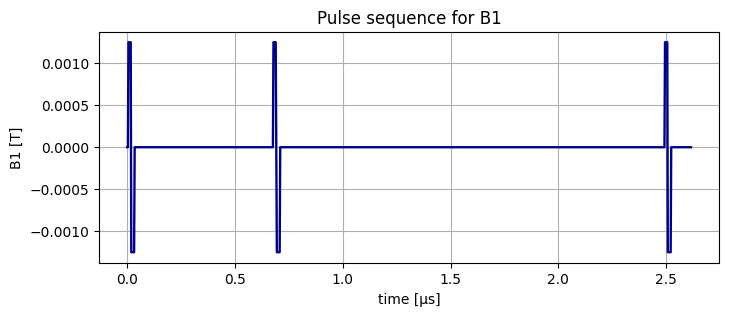

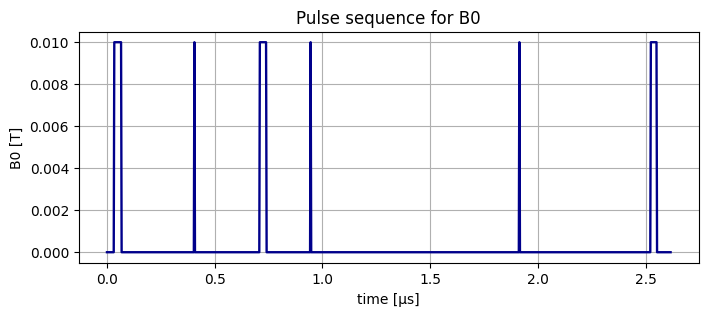

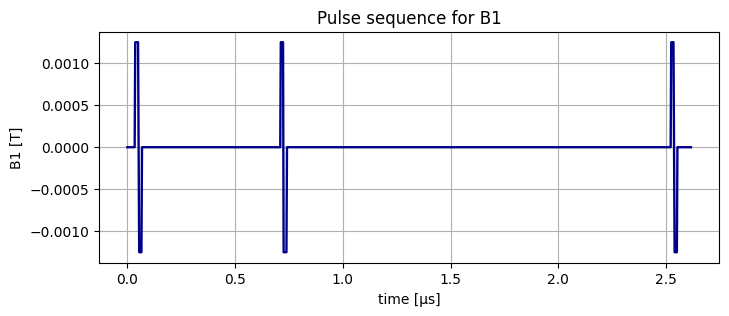

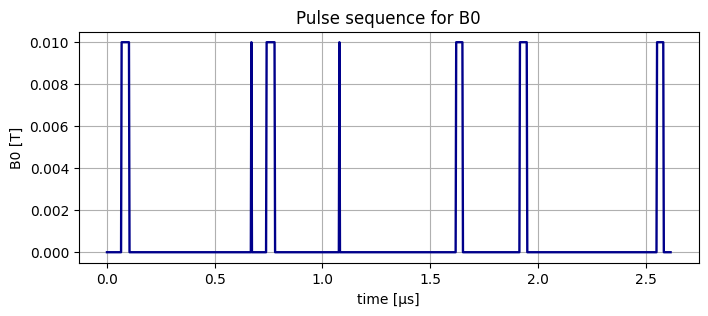

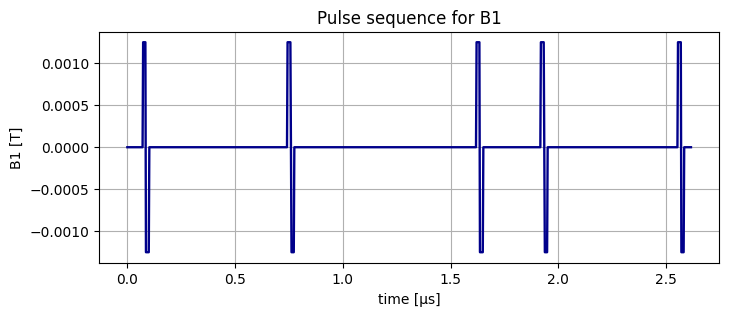

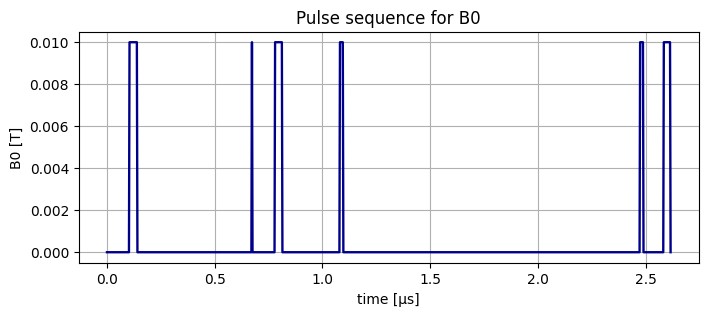

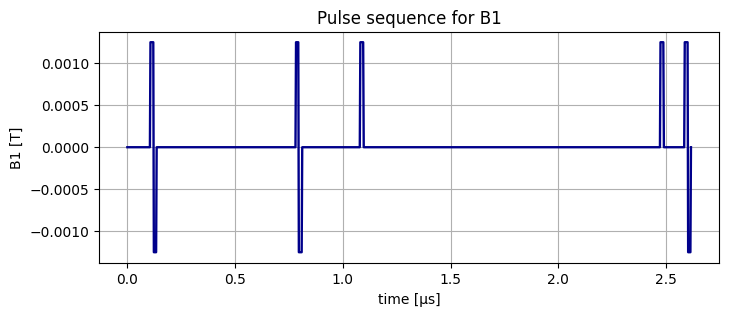

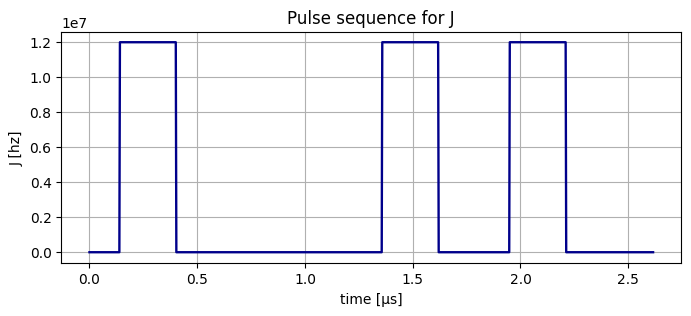

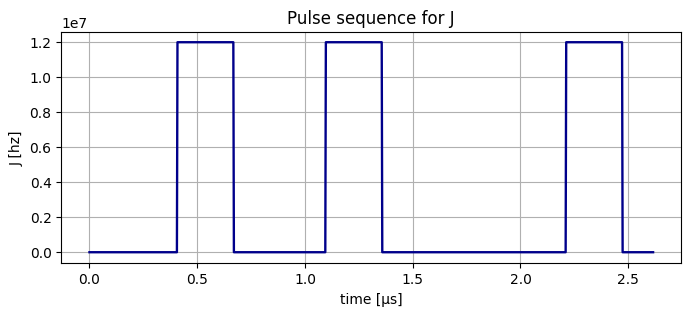

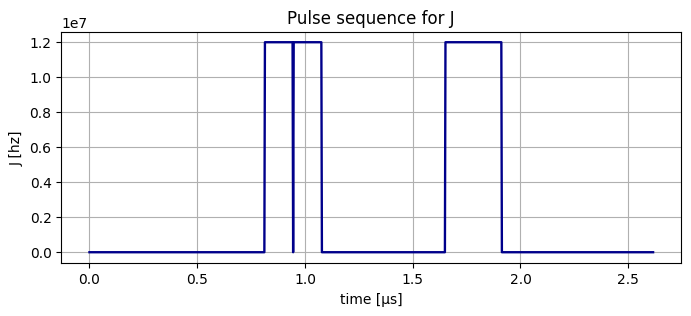

In [ ]:
plot_pulses_v2(dru_circuit)

Contador general 0
Entro par en 0
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
Contador general 1
Entro impar en 1
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
[0, 3]
time_swap = 2.617993877991494e-07
time_swap = 2.617993877991494e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_swap = 2.617993877991494e-07
time_swap = 2.617993877991494e-07
Contador general 2
Contador general 0
Entro par en 0
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
Contador general 1
Entro impar en 1
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07
[0, 3]
time_swap = 2.617993877991494e-07
time_swap = 2.617993877991494e-07
time_sqrt_swap = 1.308996938995747e-07
time_sqrt_swap = 1.308996938995747e-07

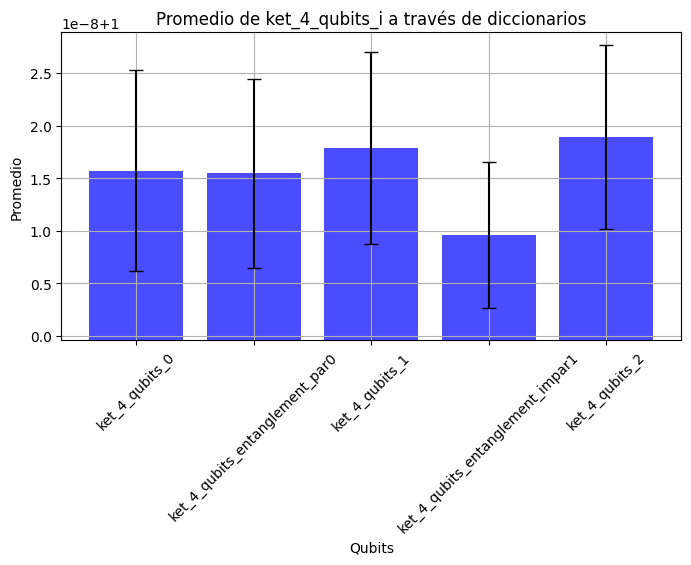

In [ ]:
np.random.seed(42)
path_before = "/content/test_states_before_states.json"
plot_fidelity(model, path_before, entanglement = True)